# 3.3 Image Histrogram Matching

In [226]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.exposure import cumulative_distribution

In [227]:
def cdf(im):
  c, b = cumulative_distribution(im)
  for i in range(b[0]):
    c = np.insert(c, 0, 0)
  for i in range(b[-1]+1, 256):
    c = np.append(c, 1)
  return c

In [228]:
def hist_matching(c, c_t, im):
  b = np.interp(c, c_t, np.arange(256)) #find clostest matches to b_t
  pix_repl = {i:b[i] for i in range(256)} #dictionary to replace the pixels
  mp = np.arange(0, 256)
  for (k, v) in pix_repl.items():
    mp[k] = v
  s = im.shape
  im = np.reshape(mp[im.ravel()], im.shape)
  im = np.reshape(im , s)
  return im.astype(np.uint8)

In [229]:
src = cv2.imread('im1.jpg')

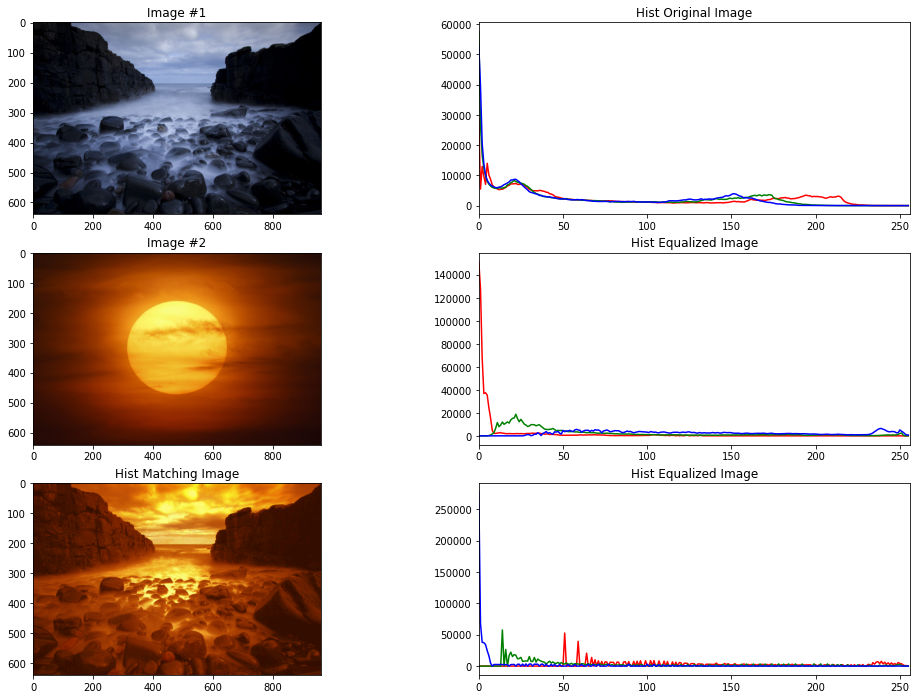

In [236]:
rows = 3
columns = 2
fig = plt.figure(figsize=(17, 12))
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(960,640))
r, g, b = cv2.split(img)

fig.add_subplot(321)
plt.title('Image #1')
plt.imshow(img)
# plt.show()

fig.add_subplot(322)
img = cv2.imread('im1.jpg')
img = cv2.resize(img,(960,640))
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Hist Original Image')
# plt.show()

# leemiddleton.jpg
img2 = cv2.imread('im2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img2)

fig.add_subplot(323)
plt.title('Image #2')
plt.imshow(img2)
# plt.show()

fig.add_subplot(324)
img2 = cv2.imread('im2.jpg')
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Hist Equalized Image')
# plt.show()

img_match = np.empty((img.shape))
# for i in range(3):
#     img_match[:,:,i] = hist_matching(cdf(img[:,:,i]),cdf(img2[:,:,i]),img[:,:,i])

# img_match[:,:,i] = hist_matching(cdf(IMG_RGB1[:,:,i]),cdf(IMG_RGB2[:,:,i]),IMG_RGB1[:,:,i])
img_match[:,:,2] = hist_matching(cdf(img[:,:,0]),cdf(img2[:,:,0]),img[:,:,0])
img_match[:,:,1] = hist_matching(cdf(img[:,:,1]),cdf(img2[:,:,1]),img[:,:,1])
img_match[:,:,0] = hist_matching(cdf(img[:,:,2]),cdf(img2[:,:,2]),img[:,:,2])

fig.add_subplot(325)
img_match = img_match.astype(np.uint8)
plt.imshow(img_match)
plt.title('Hist Matching Image')
# plt.show()

fig.add_subplot(326)
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_match],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Hist Equalized Image')
plt.show()